In [1]:
import pandas as pd
import re

In [2]:
hn = pd.read_excel('hacker_news.xlsx')

In [3]:
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80401 entries, 0 to 80400
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            80401 non-null  int64 
 1   title         80401 non-null  object
 2   url           70664 non-null  object
 3   num_points    80401 non-null  int64 
 4   num_comments  80401 non-null  int64 
 5   author        80401 non-null  object
 6   created_at    80401 non-null  object
dtypes: int64(3), object(4)
memory usage: 4.3+ MB


In [4]:
# example of regular expression
string_list = ["Julie's favorite color is Blue.",
               "Keli's favorite color is Green.",
               "Craig's favorite colors are blue and red."]

pattern = "[Bb]lue"

for s in string_list:
    if re.search(pattern, s):
        print("Match")
    else:
        print("No Match")

Match
No Match
Match


In [5]:
#converting the above list in pandas series

series = pd.Series(string_list)
print(series)
pattern = "[Bb]lue"
pattern_combined = series.str.contains(pattern)
print(pattern_combined)

0              Julie's favorite color is Blue.
1              Keli's favorite color is Green.
2    Craig's favorite colors are blue and red.
dtype: object
0     True
1    False
2     True
dtype: bool


In [6]:
# checking for python in the hackernews dataset

titles = hn["title"]

In [7]:
python_mentions = 0
pattern = '[Pp]ython'

for title in titles:
    if re.search(pattern, str(title)):
        python_mentions +=1

In [8]:
python_mentions

726

In [9]:
# using series to get number of python mentions in the title column
pattern = '[Pp]ython'
python_series = titles.str.contains(pattern).sum()
python_series

726

In [10]:
# select all titles that mention the programming language Ruby
pattern_ruby = "[Rr]uby"

ruby_titles = titles[titles.str.contains(pattern_ruby, na=False)]
ruby_titles


1104                   Programs that rewrite Ruby programs
1752     A coupon/deals site built using Roda gem for Ruby
2476     How I spent two weeks hunting a memory leak in...
2764                      A Review of Immutability in Ruby
2998     Ask HN: How is ruby web dev centered so much v...
                               ...                        
77737       Ask HN: What's your favorite ruby HTTP client?
78594                   Mruby makefiles in devops, a HOWTO
79427    Ask HN: Where do Rubyists host their application?
80002                 Ruby String Basics: Ruby Silent Cast
80190                       PostgreSQL for Ruby Developers
Name: title, Length: 209, dtype: object

In [11]:
# how many titles in our dataset mention email or e-mail
email_bool = titles.str.contains('e-?mail', na=False)

email_count = email_bool.sum()

email_titles = titles[email_bool]
email_titles

270      Obama used a pseudonym in emails with Clinton,...
344      Ask HN: How to secure your internet activity (...
678      What are the top ten email services by number ...
999      Show HN: Pepo Campaigns  1st enterprise-grade ...
1036     Ask HN: Suggestions for email provider separat...
                               ...                        
79711    Microsoft case: DoJ says it can demand every e...
79864    Microsoft battles US over warrant for drugs ca...
79879    Code to transform Hillary's emails from raw PD...
79947    Ask HN: Which email service to use for Custom ...
80092    Why you shouldn't use disposable email address...
Name: title, Length: 342, dtype: object

In [12]:
pattern_tag = '\[\w+\]'

tag_titles = titles.str.contains(pattern_tag,na=False)

tag_count = tag_titles.sum()

tag_count

1767

In [13]:
# extract all of the tags from the Hacker News titles and build a frequency table of those tags.
pattern = r"\[(\w+)\]"

tags = titles.str.extract(pattern, expand=False)

tag_freq = tags.value_counts()

In [14]:
tag_freq

pdf            1092
video           486
audio            23
2015             10
Android           4
               ... 
img               1
INFOGRAPHIC       1
4                 1
HBR               1
Ubuntu            1
Name: title, Length: 132, dtype: int64

In [15]:
def first_10_matches(pattern):
    """
    Return the first 10 story titles that match
    the provided regular expression
    """
    all_matches = titles[titles.str.contains(pattern, na=False)]
    first_10 = all_matches.head(10)
    return first_10

pattern = r"[Jj]ava[^Ss]"
java_titles = titles[titles.str.contains(pattern, na=False)]
java_titles

340                  2016 JavaOne Intel Keynote  32mn Talk
675         Swift versus Java: the bitset performance test
910      HeapStats: JVMTI agent and JavaFX analyzer for...
1038     ?Oracle pledges continued support for Java and...
1250                 Ask HN: New OSS Projects: Go or Java?
                               ...                        
78797                           Scala wrapper for Java NIO
79548                A good blog series on learning Java 8
79662               Java 9: The State of the Module System
80008    Java 8 Stream Performance, compared to for loo...
80027               Kotlin: New Hope in a Java 6 Wasteland
Name: title, Length: 222, dtype: object

In [16]:
def first_10_matches(pattern):
    """
    Return the first 10 story titles that match
    the provided regular expression
    """
    all_matches = titles[titles.str.contains(pattern, na=False)]
    first_10 = all_matches.head(10)
    return first_10

pattern = r"\b[Jj]ava\b"
java_titles = titles[titles.str.contains(pattern, na=False)]
java_titles

675         Swift versus Java: the bitset performance test
1038     ?Oracle pledges continued support for Java and...
1250                 Ask HN: New OSS Projects: Go or Java?
1295     Java Language Support for Visual Studio Code H...
1367     Ask HN: I'm Looking for Interview Question abo...
                               ...                        
79548                A good blog series on learning Java 8
79662               Java 9: The State of the Module System
80008    Java 8 Stream Performance, compared to for loo...
80019      Comparison of Asynchronous Data Loading in Java
80027               Kotlin: New Hope in a Java 6 Wasteland
Name: title, Length: 250, dtype: object

In [17]:
# beginning and end anchors to count how many titles have tags at the start versus the end of the story title in our
# Hacker News dataset

pattern = r"^(\[\w+\])"
beginning_count = titles.str.contains(pattern).sum()
print(beginning_count)

ending_pattern = "(\[\w+\]$)"
ending_count = titles.str.contains(ending_pattern).sum()
print(ending_count)

C:\Users\Aditya\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


55
1668


- extract the mentions of different SQL flavors into a new column and clean those duplicates by making them all lowercase. We'll then analyze the results to look at the average number of comments for each flavor.

In [18]:
hn_sql = hn[hn['title'].str.contains(r"\w+SQL", flags=re.I, na=False)].copy()

In [19]:
pattern = r"(\w+SQL)"
hn_sql['flavor'] = hn_sql.loc[:,"title"].str.extract(pattern,flags=re.I,expand=False)

hn_sql.loc[:,"flavor"] = hn_sql.loc[:,"flavor"].str.lower()

sql_pivot = hn_sql.pivot_table(index='flavor', values='num_comments')

In [20]:
sql_pivot

,num_comments
flavor,
cloudsql,5.000000
continuousql,7.000000
htsql,17.000000
memsql,8.000000
mssql,3.000000
mysql,21.647059
nosql,13.270270
phxsql,4.000000
postgresql,19.817391


In [21]:
pattern = r"[Py]thon ([\d\.]+)" #paranthesis is used as the capture group the pattern will only the version of the 
# python.

python_title = titles.str.extract(pattern, expand=False)

python_version = dict(python_title.value_counts())

In [22]:
python_version

{'3': 27,
 '2': 8,
 '3.5': 7,
 '3.6': 3,
 '2.7': 3,
 '3.4': 2,
 '201': 1,
 '5': 1,
 '5.0': 1,
 '3.5.2': 1,
 '1.8.1': 1,
 '8': 1,
 '2.': 1,
 '2.7.12': 1,
 '2.7.': 1,
 '4': 1,
 '3.5.0': 1,
 '1.5': 1}

In [24]:
# use a negative set to prevent matches for the + character and the . character.
def first_10_matches(pattern):
    """
    Return the first 10 story titles that match
    the provided regular expression
    """
    all_matches = titles[titles.str.contains(pattern,na=False)]
    first_10 = all_matches.head(10)
    return first_10

pattern = r"\b[Cc]\b[^.+]"
first_ten = first_10_matches(pattern)

In [25]:
first_ten

123            Talking to C Programmers about C++ [video]
142            Booksbyus/scalable-c: Scalable C  The Book
143                                  Python by the C side
247     What is the difference between String and stri...
448                          Lesser-known C coding styles
920     RoslynLinqRewrite  Compiles C# by rewriting an...
1049    How to run C programs on the BeagleBone's PRU ...
1084     Automatic C library binding generator for Golang
1340    C Preprocessor Trick for Implementing Similar ...
1607    Ask HN: What are some examples of well written...
Name: title, dtype: object

#### Lookarounds in Regular expression
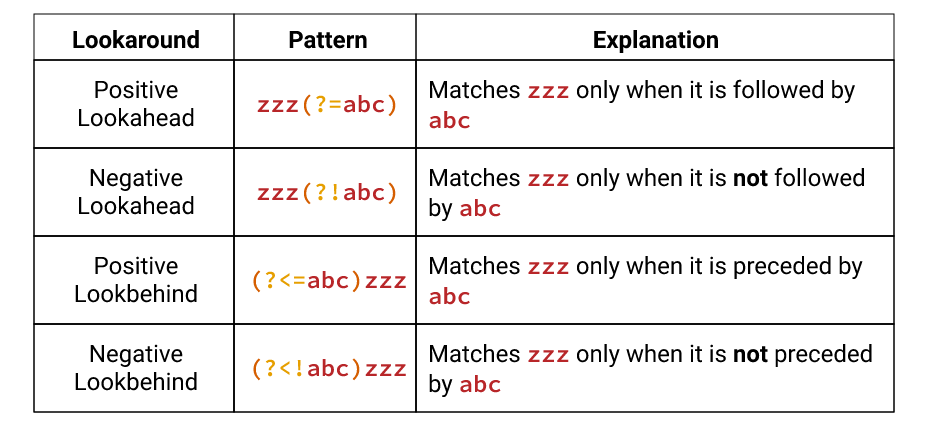

In [26]:
test_cases = ['Red_Green_Blue',
              'Yellow_Green_Red',
              'Red_Green_Red',
              'Yellow_Green_Blue',
              'Green']

In [28]:
pattern_pos = r"Green(?=_Blue)"
for tc in test_cases:
    result = re.search(pattern_pos, tc)
    print(result or "NO MATCH")
    

<re.Match object; span=(4, 9), match='Green'>
NO MATCH
NO MATCH
<re.Match object; span=(7, 12), match='Green'>
NO MATCH


In [29]:
pattern_negative = r"Green(?!_Red)"
for tc in test_cases:
    result = re.search(pattern_negative, tc)
    print(result or "NO MATCH")
    

<re.Match object; span=(4, 9), match='Green'>
NO MATCH
NO MATCH
<re.Match object; span=(7, 12), match='Green'>
<re.Match object; span=(0, 5), match='Green'>


In [35]:
positive_lookbehind = r"(?<=Red_)Green"
pattern_negative = r"Green(?!_Red)"
for tc in test_cases:
    result = re.search(positive_lookbehind, tc)
    print(result or "NO MATCH")

<re.Match object; span=(4, 9), match='Green'>
NO MATCH
<re.Match object; span=(4, 9), match='Green'>
NO MATCH
NO MATCH


In [36]:
negative_lookbehind = r"(?<!Yellow_)Green"
pattern_negative = r"Green(?!_Red)"
for tc in test_cases:
    result = re.search(negative_lookbehind, tc)
    print(result or "NO MATCH")

<re.Match object; span=(4, 9), match='Green'>
NO MATCH
<re.Match object; span=(4, 9), match='Green'>
NO MATCH
<re.Match object; span=(0, 5), match='Green'>


In [38]:
pattern = r"(?<!Series\s)\b[Cc]\b((?![+.])|\.$)"

c_mentions = titles.str.contains(pattern).sum()
c_mentions

C:\Users\Aditya\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


447

In [40]:
pattern = r"\b(\w+)\s\1\b"
repeated_words = titles[titles.str.contains(pattern,na=False)]
repeated_words

5285      Ask HN: Allowance for for fun post and comments?
7325                               An anti-torpedo torpedo
7758     Uncovering the truth about the British empire ...
9966                Wire Wire: A West African Cyber Threat
10349               Bye Bye Skype, canceling Skype account
10945    Mcdonalds copying cyriak  cows cows cows in th...
11230                     Ooh Ooh My Turn Why Lisp? (2008)
12853    Intel Intel Software Guard Extensions Explaine...
15203          Intellij-Rust Rust Plugin for IntelliJ IDEA
17603    The real damage Brexit will do do this industr...
17672    340 billion billion billion billion: possible ...
21543                 Silicon Valley Has a Problem Problem
22005                 Silicon Valley Has a Problem Problem
22717    Ask HN: What's the #1 place on the web you go ...
27580            Lawyer lawyer lawyer LAWYER lawyer LAWYER
27804                               What Makes Texas Texas
28231    Buffalo buffalo Buffalo buffalo buffalo buffal.

In [42]:
test_urls = pd.Series([
 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
 'http://www.interactivedynamicvideo.com/',
 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0',
 'http://evonomics.com/advertising-cannot-maintain-internet-heres-solution/',
 'HTTPS://github.com/keppel/pinn',
 'Http://phys.org/news/2015-09-scale-solar-youve.html',
 'https://iot.seeed.cc',
 'http://www.bfilipek.com/2016/04/custom-deleters-for-c-smart-pointers.html',
 'http://beta.crowdfireapp.com/?beta=agnipath',
 'https://www.valid.ly?param',
 'http://css-cursor.techstream.org'
])

pattern = r"https?://([\w\-\.]+)"
test_urls_clean = test_urls.str.extract(pattern, flags=re.I, expand=False)
domains = hn['url'].str.extract(pattern, flags=re.I, expand=False)
top_domains = domains.value_counts().head(5)
top_domains

github.com             4157
medium.com             3218
www.nytimes.com        1940
www.theguardian.com    1026
techcrunch.com          964
Name: url, dtype: int64

In [43]:

pattern =r"(https?)://([\w\.\-]+)/?(.*)"
test_url_parts= test_urls.str.extract(pattern,flags=re.I)
url_parts = hn['url'].str.extract(pattern, flags=re.I)
url_parts

,0,1,2
0,https,blog.menswr.com,2016/09/07/whats-new-with-your-style-feed/
1,NaN,NaN,NaN
2,https,www.technologyreview.com,s/602442/amazons-algorithms-dont-find-you-the-...
3,http,m.imgur.com,gallery/th6Ua
4,http,www.nytimes.com,2016/09/25/technology/phone-makers-could-cut-o...
...,...,...,...
80396,http,zyghost.com,articles/My-Keyboard.html
80397,http,www.dailytech.com,Exclusive+Googles+New+Search+Icon+Was+Created+...
80398,https,utcc.utoronto.ca,~cks/space/blog/sysadmin/NoACLTemptation
80399,NaN,NaN,NaN


In [45]:
# Applying column names to the table above

pattern =r"(?P<protocol>https?)://(?P<domain>[\w\.\-]+)/?(?P<path>.*)"
test_url_parts= test_urls.str.extract(pattern,flags=re.I)
url_parts = hn['url'].str.extract(pattern, flags=re.I)
url_parts

,protocol,domain,path
0,https,blog.menswr.com,2016/09/07/whats-new-with-your-style-feed/
1,NaN,NaN,NaN
2,https,www.technologyreview.com,s/602442/amazons-algorithms-dont-find-you-the-...
3,http,m.imgur.com,gallery/th6Ua
4,http,www.nytimes.com,2016/09/25/technology/phone-makers-could-cut-o...
...,...,...,...
80396,http,zyghost.com,articles/My-Keyboard.html
80397,http,www.dailytech.com,Exclusive+Googles+New+Search+Icon+Was+Created+...
80398,https,utcc.utoronto.ca,~cks/space/blog/sysadmin/NoACLTemptation
80399,NaN,NaN,NaN
